In [11]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# reading the csv file and creating the dataframe
temperature_filename = "Data/Shiplake_6h_averages.csv"
temperature_df = pd.read_csv(temperature_filename)

# renaming columns of dataframe
temperature_df.columns = ['Time', 'Temp_river', 'Temp_air', 'Riverlevel', 'Level_min', 'Level_max']

# changing the data types of the time and value columns
temperature_df['Time'] = pd.to_datetime(temperature_df['Time'])

# removing any negative values of river temperature
# temperature_df = temperature_df[temperature_df['Temp_river'] > 0]

# filling any nan values 
temperature_df.fillna(method='ffill', inplace=True)

# narrowing down data to 2017-2020 only

# we can extract dates between A and B by using something called a 'mask'
# we basically create a list of [True True False..... True False]
# then we can extract those rows which are 'True' from the DataFrame
 
mask_start_date = pd.to_datetime('2019--01')        # YYYY-MM-DD
mask_end_date = pd.to_datetime('2021-01-01')          # YYYY-MM-DD

# form the 'mask' - the list of True and False
mask = (temperature_df['Time'] >= mask_start_date) & (temperature_df['Time'] <= mask_end_date)
 
# create the dataframe for 2017-2021
temp_17to21_df = temperature_df.loc[mask]

# removing columns that aren't needed 
temp_17to21_df = temp_17to21_df.drop(columns=['Riverlevel', 'Level_min', 'Level_max'])

In [12]:
temp_17to21_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 7303 to 10227
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Time        2925 non-null   datetime64[ns]
 1   Temp_river  2925 non-null   float64       
 2   Temp_air    2925 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 91.4 KB


In [13]:
# creating moving average to remove noise 
temperature_SMA = temp_17to21_df.Temp_river.rolling(window=28).mean()

# add into dataframe 
temp_17to21_df['Temp_SMA'] = temperature_SMA

In [14]:
temp_17to21_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 7303 to 10227
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Time        2925 non-null   datetime64[ns]
 1   Temp_river  2925 non-null   float64       
 2   Temp_air    2925 non-null   float64       
 3   Temp_SMA    2898 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 114.3 KB


In [15]:
temp_17to21_df.describe()

,Temp_river,Temp_air,Temp_SMA
count,2925.000000,2925.000000,2898.000000
mean,10.342504,11.193319,10.414044
std,5.607949,5.080471,4.721831
min,-4.333778,1.498597,0.162090
25%,6.232277,6.633766,6.521966
50%,9.917840,10.882993,9.798955
75%,14.515095,15.756317,14.602456
max,31.554656,22.466850,22.184586


As we can see from the above table, the smoothed temperature has succesfully transformed any negative river temperatures

In [16]:
# Looking just at 2020
mask_start_date = pd.to_datetime('2020-01-01')        # YYYY-MM-DD
mask_end_date = pd.to_datetime('2021-01-01')          # YYYY-MM-DD

# form the 'mask' - the list of True and False
mask = (temp_17to21_df['Time'] >= mask_start_date) & (temp_17to21_df['Time'] <= mask_end_date)

# removing 29th February 
temp_17to21_df = temp_17to21_df[~((temp_17to21_df['Time'].dt.month == 2) &(temp_17to21_df['Time'].dt.day ==29))] 

# create the dataframe for 2020
temp_2020_df = temp_17to21_df.loc[mask]

# removing 1st january 2021
temp_2020_df.drop(temp_2020_df.tail(1).index,inplace=True) 

/Users/stevenjones/opt/anaconda3/envs/LEO3YP2020/lib/python3.8/site-packages/pandas/core/frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [17]:
temp_2020_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 8763 to 10226
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Time        1460 non-null   datetime64[ns]
 1   Temp_river  1460 non-null   float64       
 2   Temp_air    1460 non-null   float64       
 3   Temp_SMA    1460 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 57.0 KB


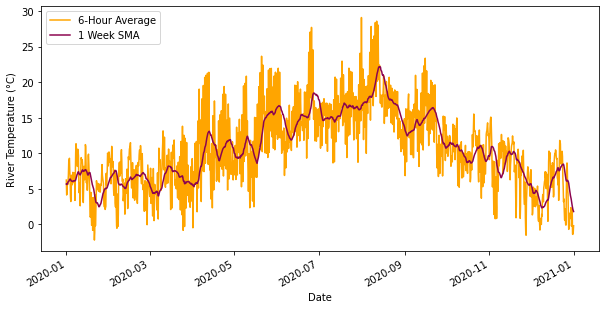

In [24]:
# plot for 2020
fig = plt.figure(figsize=(10, 5))

plt.plot(temp_2020_df['Time'], temp_2020_df['Temp_river'], color='orange', label = "6-Hour Average")
plt.plot(temp_2020_df['Time'],temp_2020_df['Temp_SMA'], '#8c044F', label = "1 Week SMA")
plt.xlabel('Date')
plt.ylabel('River Temperature (°C)')
plt.legend(loc="upper left")

fig.autofmt_xdate()


In [19]:
# Storing 2020 dataframe so can import in another notebook
%store temp_2020_df

Stored 'temp_2020_df' (DataFrame)


In [20]:
# checking how many 6 hour slots the temperature is less than 3°C at
za = (temp_2020_df['Temp_SMA'] < 3).sum()
print(za)

33
